In [2]:
from env import VanillaEnv, CrafterReplayBuffer, create_local_semantic
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import crafter

c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


Done! Episode Reward:  1.1
(64, 64, 3)


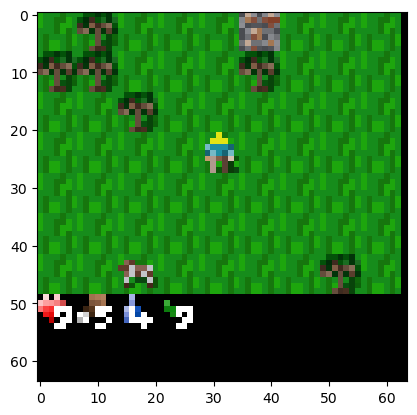

In [3]:
env =  VanillaEnv(seed=4)
env = crafter.Env()
state = env.reset()
done = False
rewards = []
frames_arr = []

while not done:
    action = np.random.randint(low=0, high=17)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[-1].shape)
        # plt.imshow(np.moveaxis(frames_arr[0], 0, -1), vmin=0., vmax=1.)
        plt.imshow(frames_arr[120])
        break

In [4]:
buffer = CrafterReplayBuffer('cpu', 0, './dataset')

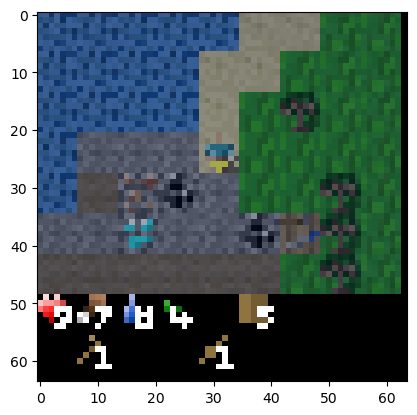

In [5]:
image, action = buffer.sample(1)
plt.imshow(np.moveaxis(image.numpy().squeeze(), 0, -1), vmin=0., vmax=1.)

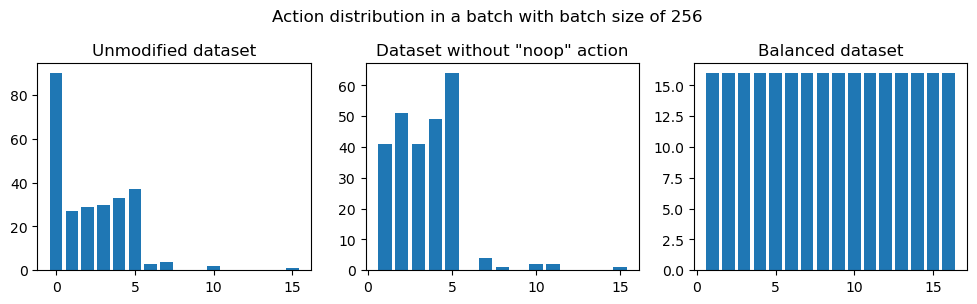

In [9]:
labels1, counts1 = [],[]
labels2, counts2 = [],[]
labels3, counts3 = [],[]

buffer = CrafterReplayBuffer('cpu', 0, './dataset', remove_noop=False)
image, action = buffer.sample(256, balance=False)
labels1, counts1 = np.unique(action, return_counts=True)

buffer = CrafterReplayBuffer('cpu', 2, './dataset', remove_noop=True)
image, action = buffer.sample(256, balance=False)
labels2, counts2 = np.unique(action, return_counts=True)

image, action = buffer.sample(256, balance=True)
labels3, counts3 = np.unique(action, return_counts=True)

fig = plt.figure(figsize=(12, 3))
plot1 = fig.add_subplot(1, 3, 1)
plot2 = fig.add_subplot(1, 3, 2)
plot3 = fig.add_subplot(1, 3, 3)

plot1.bar(labels1, counts1, align='center')
plot2.bar(labels2, counts2, align='center')
plot3.bar(labels3, counts3, align='center')

plot1.set_title("Unmodified dataset")
plot2.set_title('Dataset without "noop" action')
plot3.set_title("Balanced dataset")

fig.suptitle("Action distribution in a batch with batch size of 256")
fig.subplots_adjust(top=0.80)
# plt.gca().set_xticks(labels1)
plt.savefig("action-dist.pdf")
plt.show()


c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


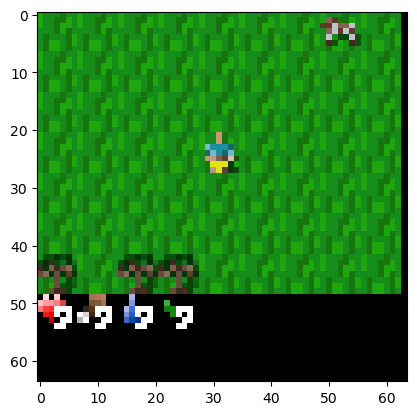

In [6]:
import gym
import crafter

env = env = crafter.Env(seed="6alZBPJBjvEr2YMpv6VDbP")  # Or CrafterNoReward-v1
env = crafter.Recorder(
  env, './path/to/logdir',
  save_stats=True,
  save_video=False,
  save_episode=False,
)
obs = env.reset()
plt.imshow(obs)


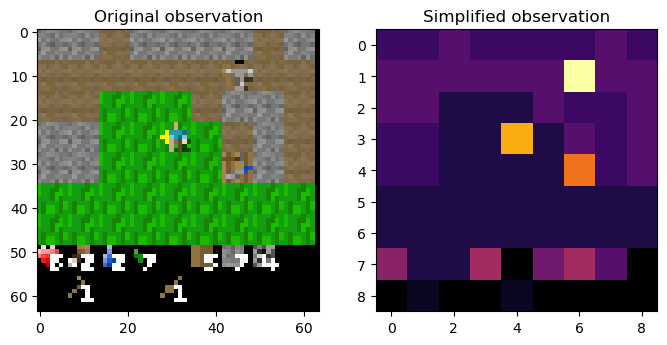

In [11]:
original, semantic = None, None
# 343
with np.load("./dataset" + os.sep + "6alZBPJBjvEr2YMpv6VDbP.npz") as data:
    curr_idx = 343
    original = data['image'][curr_idx]
    img = create_local_semantic(
            data['semantic'][curr_idx], data['player_pos'][curr_idx][0], data['player_pos'][curr_idx][1],
            data['inventory_health'][curr_idx], data['inventory_food'][curr_idx],
            data['inventory_drink'][curr_idx], data['inventory_energy'][curr_idx],
            data['inventory_sapling'][curr_idx], data['inventory_wood'][curr_idx],
            data['inventory_stone'][curr_idx], data['inventory_coal'][curr_idx],
            data['inventory_iron'][curr_idx], data['inventory_diamond'][curr_idx],
            data['inventory_wood_pickaxe'][curr_idx], data['inventory_stone_pickaxe'][curr_idx],
            data['inventory_iron_pickaxe'][curr_idx], data['inventory_wood_sword'][curr_idx],
            data['inventory_stone_sword'][curr_idx], data['inventory_iron_sword'][curr_idx],
        )
    # img = img.astype(np.int8)
    semantic = img.T

fig = plt.figure(figsize=(8, 4))
plot1 = fig.add_subplot(1,2,1)
plot1.set_title("Original observation")
plot1.imshow(original)
plot2 = fig.add_subplot(1,2,2)
plot2.set_title("Simplified observation")
plot2.imshow(semantic, cmap="inferno")
plt.savefig('semantic.png')

In [8]:
print(env.action_space)

Discrete(17)


In [9]:
for file in os.listdir('./dataset/'):
    local_semantics = []
    actions = []
    with np.load('./dataset/' + os.sep + file) as data:
        for curr_idx in range(1, data['image'].shape[0]):
            semantic = create_local_semantic(
                data['semantic'][curr_idx], data['player_pos'][curr_idx][0], data['player_pos'][curr_idx][1],
                data['inventory_health'][curr_idx], data['inventory_food'][curr_idx],
                data['inventory_drink'][curr_idx], data['inventory_energy'][curr_idx],
                data['inventory_sapling'][curr_idx], data['inventory_wood'][curr_idx],
                data['inventory_stone'][curr_idx], data['inventory_coal'][curr_idx],
                data['inventory_iron'][curr_idx], data['inventory_diamond'][curr_idx],
                data['inventory_wood_pickaxe'][curr_idx], data['inventory_stone_pickaxe'][curr_idx],
                data['inventory_iron_pickaxe'][curr_idx], data['inventory_wood_sword'][curr_idx],
                data['inventory_stone_sword'][curr_idx], data['inventory_iron_sword'][curr_idx],
            )
            local_semantics.append(semantic)
            actions.append(data['action'][curr_idx])

    local_semantics = np.array(local_semantics, dtype=np.int8)
    actions = np.array(actions, dtype=np.int8)
    np.savez('dataset-semantic/'+file, local_semantics=local_semantics, actions=actions)
    print("Saved file", local_semantics.shape, actions.shape)

Saved file (294, 9, 9) (294,)
Saved file (777, 9, 9) (777,)
Saved file (444, 9, 9) (444,)
Saved file (273, 9, 9) (273,)
Saved file (652, 9, 9) (652,)


KeyboardInterrupt: 

In [ ]:
local_semantics = []
actions = []
for file in os.listdir('./dataset/'):
    
    with np.load('./dataset/' + os.sep + file) as data:
        for curr_idx in range(1, data['image'].shape[0]):
            semantic = create_local_semantic(
                data['semantic'][curr_idx], data['player_pos'][curr_idx][0], data['player_pos'][curr_idx][1],
                data['inventory_health'][curr_idx], data['inventory_food'][curr_idx],
                data['inventory_drink'][curr_idx], data['inventory_energy'][curr_idx],
                data['inventory_sapling'][curr_idx], data['inventory_wood'][curr_idx],
                data['inventory_stone'][curr_idx], data['inventory_coal'][curr_idx],
                data['inventory_iron'][curr_idx], data['inventory_diamond'][curr_idx],
                data['inventory_wood_pickaxe'][curr_idx], data['inventory_stone_pickaxe'][curr_idx],
                data['inventory_iron_pickaxe'][curr_idx], data['inventory_wood_sword'][curr_idx],
                data['inventory_stone_sword'][curr_idx], data['inventory_iron_sword'][curr_idx],
            )
            local_semantics.append(semantic)
            actions.append(data['action'][curr_idx])

    print(f"Mean: {np.mean(local_semantics)}, standard deviation: {np.std(local_semantics)}, Max: {np.max(local_semantics)}")

print(f"Final Mean: {np.mean(local_semantics)}, standard deviation: {np.std(local_semantics)}")


In [ ]:
i = 0
for file in os.listdir('./dataset/'):
    print("Loading ", file)
    with np.load('./dataset/' + os.sep + file) as data:
        for image, action in zip(data['image'], data['action']):
            if action == 0: i+=1
print(i)